In [2]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.stats import lognorm

%matplotlib widget

In [3]:
plt.close('all')

In [4]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


In [19]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230209_quinine (2)'
subfolder = glob.glob(cwd + '/quinine_1E-4M_400ms_Abs**')
subfolder.sort()
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230209_quinine (2)/quinine_1E-4M_400ms_Abs_20230216-180244_45058e15.csv


In [20]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

title = ['quinine_1E-4M_400ms_FEP']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label = title
         # 'ZnI2 128 uL/min']

quinine_1E-4M_400ms_Abs_20230216-180244_45058e15.csv


In [21]:
## Reading dark and reference
dark = glob.glob(cwd + '/Dark_400ms**.csv')
ref = glob.glob(cwd + '/H2SO4_400ms**.csv')

dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

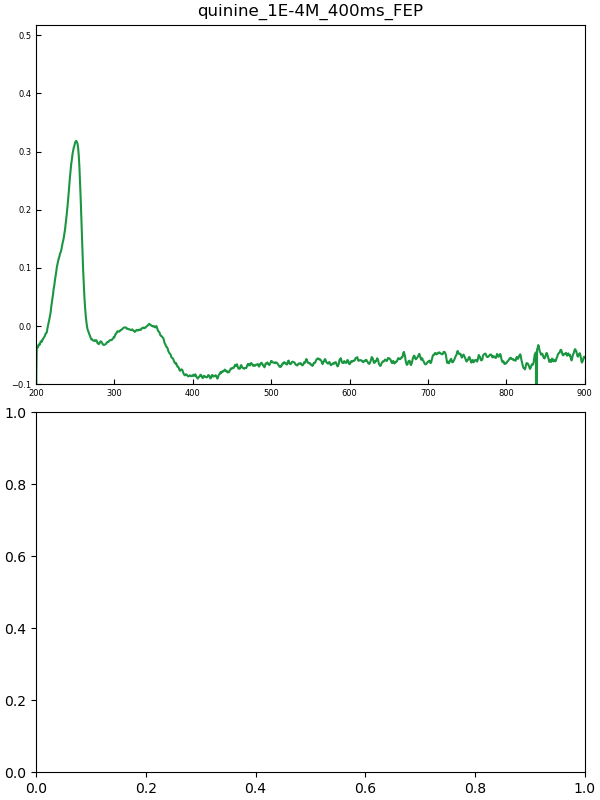

In [22]:
## Plot All PL profiles in each subfolder
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(2, 1, figsize = (6, 8), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 0
w2 = 800

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i])
    data_files.sort()
    # del data_files[0]
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    
    color_idx = np.linspace(0, 1, k2-k1+1)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    
    skiprows=5
    
    for j in range(k1, k2):
        # df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        df_j = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
        absorbance = -np.log10((df_j.Sample-dark_df.Sample)/(ref_df.Sample-dark_df.Sample))
        ax1[i].plot(df_j.Energy, absorbance, color=cmap(color_idx[j-k1]))
        ax1[i].set_xlim(200, 900)
        ax1[i].set_ylim(-0.1, max(absorbance[w1:w2])+0.2)
        ax1[i].tick_params(axis='both', direction='in', labelsize=6)
        
        ## Insert Annotation
        '''
        at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
        ax1[i].add_artist(at)
        '''
        
#         #df_i[f'Iten_{j}'] = df_j.intensity
#         df_i = pd.concat([df_i, absorbance], axis=1, ignore_index=True)
    
#     df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)
#     #df_norm[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1) / df_i.mean(axis=1).sum(axis=0)
#     df_norm[f'{os.path.basename(subfolder[i])}']= df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2] / df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].sum(axis=0)
    
    
#     x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
#     min_max_scaler = preprocessing.MinMaxScaler()
#     x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
#     df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

    
df['Energy'] = df_j.Energy
df['Absorbance'] = absorbance
# df_norm['Energy'] = df_j.Energy.loc[w1:w2]
# #df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
# df_norm2.loc[0:w2-w1, 'Energy'] = df_j.Energy.loc[w1:w2].values

In [23]:
df[210:215]

Energy  Absorbance
210  364.721267   -0.030461
211  365.509089   -0.033001
212  366.296840   -0.035471
213  367.084519   -0.036018
214  367.872128   -0.038246

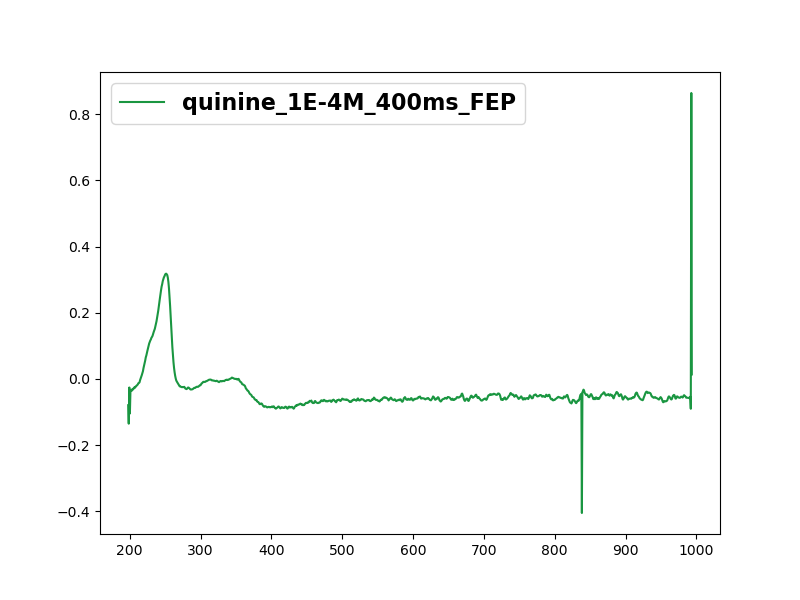

In [11]:
## Plot average PL profiles in each subfolder
f2, ax2 = plt.subplots(1, 1, figsize = (8, 6))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax2.plot(df.Energy, getattr(df, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=os.path.basename(title[i]))

legend_properties = {'weight':'bold', 'size':16}    
ax2.legend(fontsize=legendsize, prop=legend_properties)